In [1]:
import sys
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import ccal

%matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.max_open_warning'] = 200

================= Computational Cancer Analysis Library (CCAL) =================


# Test new API

In [2]:
DATA_DIR = '/home/cyborg/onco_gps/data/'
RESULT_DIR = '/home/cyborg/onco_gps/result/'
k = 9
w_matrix = ccal.read_gct(os.path.join(RESULT_DIR, 'kras_genes', 'fdr{}'.format(0.075), 'nmf', 'matrices', 'nmf_k{}_w.gct'.format(k)))
h_matrix = ccal.read_gct(os.path.join(RESULT_DIR, 'kras_genes', 'fdr{}'.format(0.075                                                                              ), 'nmf', 'matrices', 'nmf_k{}_h.gct'.format(k)))

<165838> Loading targets bundle ...
<165838> Reading H Matrix ...
<165838> 	Data: <class 'pandas.core.frame.DataFrame'>.
<165838> 	Data type: continuous.
<165838> 	Is ascending: False.
<165838> 	Index axis: 0.
<165838> 	Index: 2.
<165838> 	Index alias: Component 2.
<165838> 	Read 1 features & 750 samples.
<165838> Loading feature bundle ...
<165838> Reading Phenotype ...
<165838> 	Data: <class 'str'>.
<165838> 	Data type: binary.
<165838> 	Is ascending: False.
<165838> 	Index axis: 0.
<165838> 	Index: [].
<165838> 	Index alias: [].
<165838> 	Read 212 features & 1142 samples.
<165838> Reading Drug Sensitivity ...
<165838> 	Data: <class 'str'>.
<165838> 	Data type: continuous.
<165838> 	Is ascending: True.
<165838> 	Index axis: 0.
<165838> 	Index: [].
<165838> 	Index alias: [].
<165838> 	Read 481 features & 645 samples.
<165838> 
<165838> $
<165838> $$
<165838> $$$
<165838> Annotating Component 2 with Drug Sensitivity ...
<165838> Target Component 2 (597 cols) and features (597 cols) hav

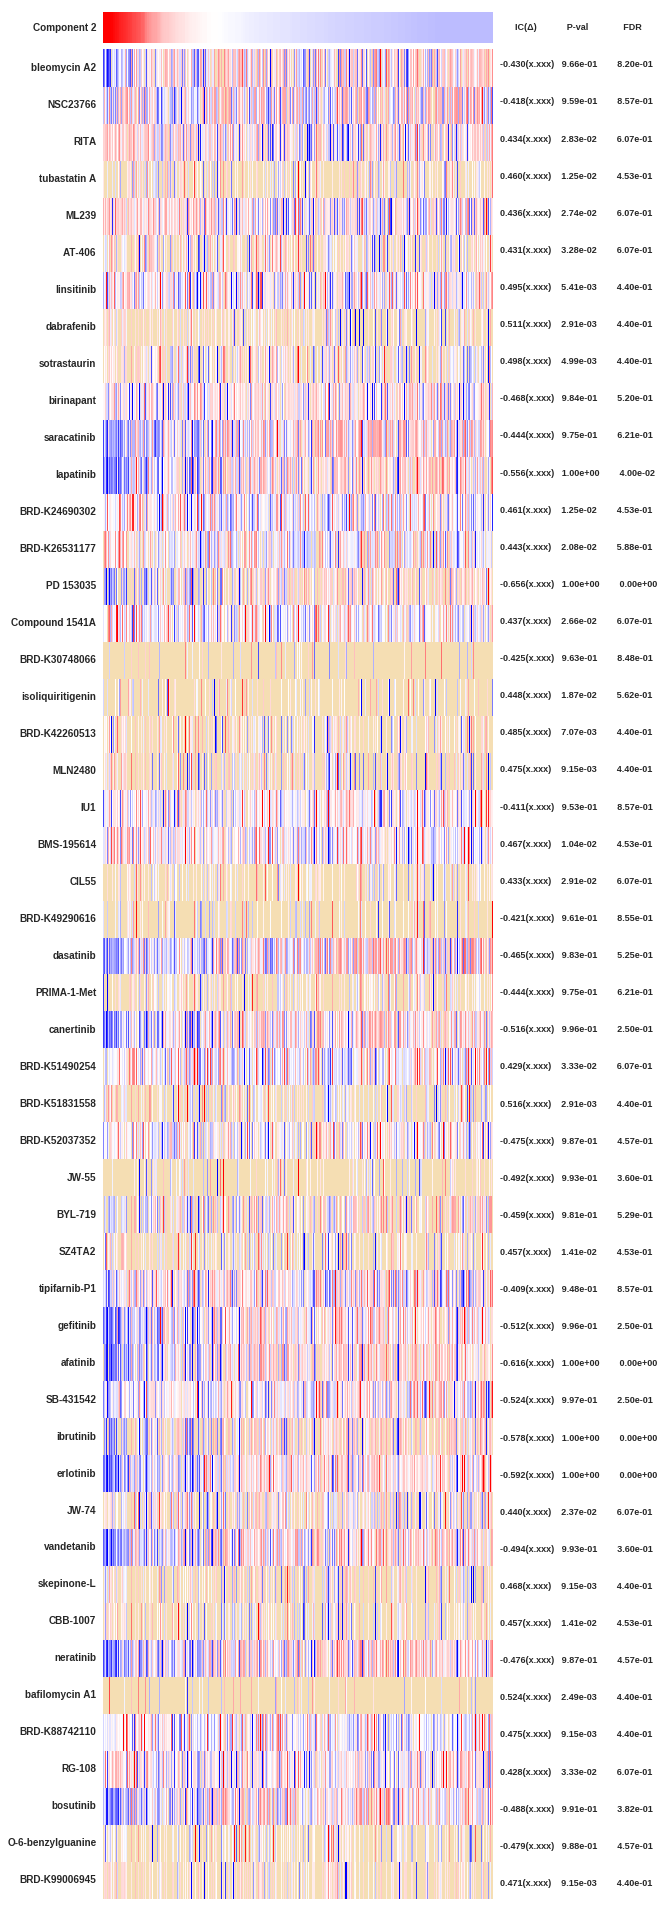

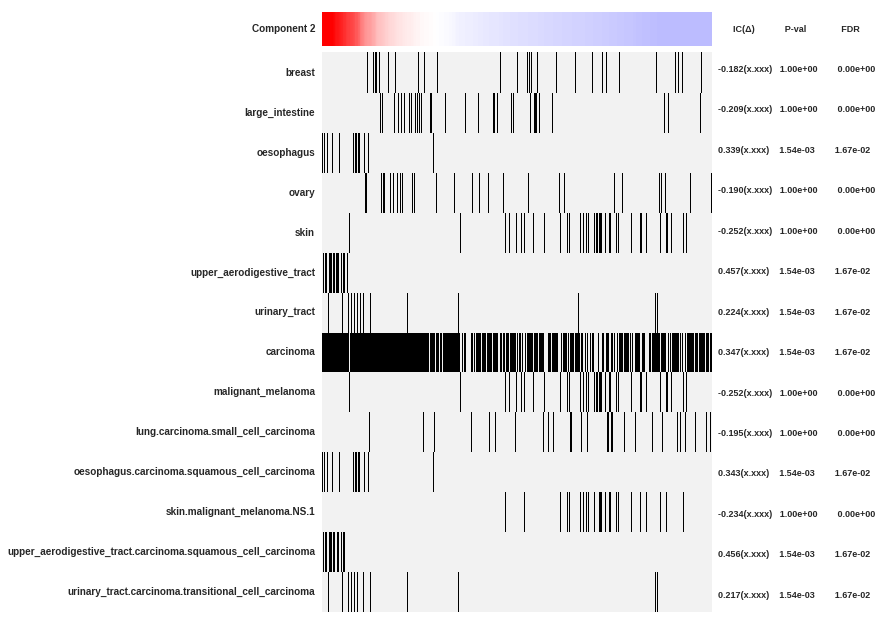

In [3]:
feature_bundle = [['Variant', '/home/cyborg/data/ccle/ccle_variants.gct', 'binary', False, 0, [], []],
                  ['Gene Dependency', '/home/cyborg/data/ccle/ccle_gene_dependencies.gct', 'continuous', True, 0, [], []],
                  ['Gene Expression', '/home/cyborg/data/ccle/ccle_gene_expressions.gct', 'continuous', False, 0, [], []],
                  ['Pathway Expression', '/home/cyborg/data/ccle/ccle_pathway_expressions.gct', 'continuous', False, 0, [], []],
                  ['Protein Expression', '/home/cyborg/data/ccle/ccle_protein_expressions.gct', 'continuous', False, 0, [], []],
                  ['Pathology',  '/home/cyborg/data/ccle/ccle_pathologies.gct', 'binary', False, 0, [], []],
                  ['Phenotype', '/home/cyborg/data/ccle/ccle_phenotypes.gct', 'binary', False, 0, [], []],
                  ['Drug Sensitivity', '/home/cyborg/data/ccle/ccle_drug_sensitivities.gct', 'continuous', True, 0, [], []]]
feature_bundle = [b for b in feature_bundle if b[0] in ('Phenotype', 'Drug Sensitivity')]

target_bundle = [['H Matrix', h_matrix, 'continuous', False, 0, 2, 'Component 2']]

ccal.make_association_panels(target_bundle, feature_bundle,
                             n_jobs=1, n_samplings=5, n_permutations=5,
                             filepath_prefix='output/top0.05')

# Test parallel computing

In [ ]:
features = ccal.support.simulate_dataframe_or_series(100, 10)
target = ccal.support.simulate_dataframe_or_series(1, 10)

ccal.association.match(features, target, 'output/association/parallel100', n_jobs=4, n_samplings=5, n_permutations=5, min_n_per_job=1)

In [ ]:
features = ccal.support.simulate_dataframe_or_series(103, 10)
target = ccal.support.simulate_dataframe_or_series(1, 10)

ccal.association.match(features, target, 'output/association/parallel101', n_jobs=4, n_samplings=5, n_permutations=5)

# Test various cases using loop

In [ ]:
ccal.support.VERBOSE = False

for feature_n_categories in [None, 10, 2]:
    if feature_n_categories:
        if feature_n_categories == 2:
            feature_type = 'binary'
        elif feature_n_categories > 2:
            feature_type = 'categorical'
    else:
        feature_type = 'continuous'
        
    for target_n_categories in [None, 10, 2]:
        if target_n_categories:
            if target_n_categories == 2:
                target_type = 'binary'
            elif target_n_categories > 2:
                target_type = 'categorical'
        else:
            target_type = 'continuous'
            
        for r in [10, 100]:
            for c in [10, 100]:
                features = ccal.support.simulate_dataframe_or_series(r, c, n_categories=feature_n_categories)
                target = ccal.support.simulate_dataframe_or_series(1, c, n_categories=target_n_categories)
                
                for n_samplings in [10, 2]:
                    for n_permutations in [10, 2]:
                        title = '{}-{}-{}row-{}col-{}smpl-{}perm'.format(feature_type, target_type, r, c, n_samplings, n_permutations)
                        print(title)
                        
                        ccal.association.match(features, target, 'output/association/{}'.format(title),
                                               feature_type=feature_type, target_type=target_type,
                                               n_samplings=n_samplings, n_permutations=n_permutations,
                                               title=title)